In [1]:
!pip install kaggle

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d oarcanjomiguel/citrus-greening
!unzip -q citrus-greening.zip -d dataset

 99% 1.36G/1.38G [00:14<00:00, 123MB/s]
100% 1.38G/1.38G [00:14<00:00, 101MB/s]


In [6]:
import os
import cv2
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # Resize the image to a fixed size
        images.append(img)
    return images

In [20]:
greening_path = '/content/dataset/field/greening'
healthy_path = '/content/dataset/field/healthy'

# Load images from both classes
greening_images = load_images(greening_path)
healthy_images = load_images(healthy_path)

In [21]:
# Convert images to numpy arrays
greening_images = np.array(greening_images)
healthy_images = np.array(healthy_images)

# Flatten the images
greening_images_flatten = greening_images.reshape(len(greening_images), -1)
healthy_images_flatten = healthy_images.reshape(len(healthy_images), -1)

# Combine the flattened images
all_images_flatten = np.concatenate([greening_images_flatten, healthy_images_flatten], axis=0)

# Normalize the pixel values
all_images_flatten = all_images_flatten / 255.0

In [22]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(all_images_flatten)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(all_images_flatten)

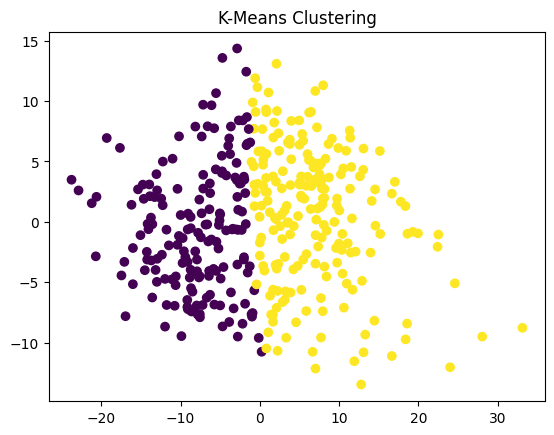

In [24]:
# Scatter plot of the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()